In [154]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [106]:
import glob #list .txt file
pos_list=glob.glob("data\\movie-reviews-en\\train\\pos\\*.txt")
neg_list=glob.glob("data\\movie-reviews-en\\train\\neg\\*.txt")

In [107]:
full_text = ''

for file in pos_list:
    f = open(file, "r")
    full_text += f.read()

for file in neg_list:
    f = open(file, "r")
    full_text += f.read()
    

In [108]:
import string
#Delete punctuation
full_text = full_text.translate(str.maketrans('','', string.punctuation)).replace('\n','')

In [109]:
from collections import Counter
#Count each word
count = Counter(full_text.split())

In [110]:
len(count) #Nb de mots

45241

In [111]:
n_word = 200
most_common = count.most_common(n_word)
most_common[0:6]

[('the', 68395),
 ('a', 34165),
 ('and', 31648),
 ('of', 30420),
 ('to', 28507),
 ('is', 22511)]

In [112]:
reducing = lambda x: x[0]

In [113]:
n = len(pos_list)
data_pos = np.zeros((n,n_word))

for file,i in zip(pos_list,range(n)):
    f = open(file, "r")
    text = f.read()
    
    for j in range(0,n_word):
        
        if most_common[j][0] in text:
            
    
            data_pos[i][j]=text.split(' ').count(most_common[j][0])
            
        else:
            data_pos[i][j]=0 

In [114]:
data_pos

array([[42., 15., 19., ...,  0.,  0.,  0.],
       [28., 22., 17., ...,  1.,  0.,  0.],
       [32.,  9.,  9., ...,  0.,  0.,  0.],
       ...,
       [39., 16., 25., ...,  0.,  0.,  1.],
       [33., 13., 18., ...,  0.,  0.,  0.],
       [28., 15., 16., ...,  0.,  1.,  0.]])

In [115]:
n = len(neg_list)
data_neg = np.zeros((n,n_word))

for file,i in zip(neg_list,range(n)):
    f = open(file, "r")
    text = f.read()
    
    for j in range(0,n_word):
        
        if most_common[j][0] in text:
            data_neg[i][j]=text.split(' ').count(most_common[j][0])
        else:
            data_neg[i][j] =0 

In [202]:
np.sum(data_neg<=0)

94753

In [203]:
np.sum(data_pos<=0)

93446

In [118]:
df_pos = pd.DataFrame(data=data_pos, dtype=np.int16,columns=list(map(reducing,most_common)))
df_neg = pd.DataFrame(data=data_neg, dtype=np.int16,columns=list(map(reducing,most_common)))
df_pos['class']=1
df_neg['class']=0
df = pd.concat([df_pos,df_neg])

In [128]:
df[df<0].sum().sum()

0.0

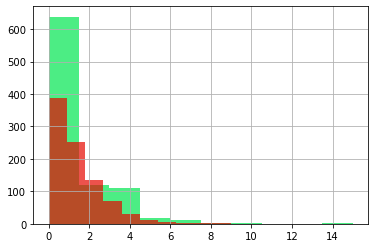

In [197]:
df['good'][df['class']==1].hist(alpha=0.7,color='#00e650') 
df['good'][df['class']==0].hist(alpha=0.7,color='#e60800')

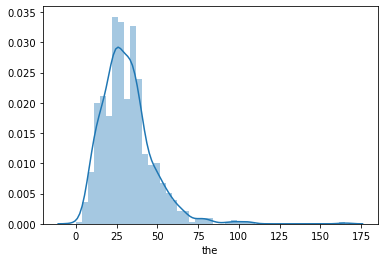

In [122]:
sns.distplot(df['the'][df['class']==0])

In [129]:
df.head()

,the,a,and,of,to,is,in,that,it,as,...,plays,long,cast,john,old,ever,comes,young,without,class
0,42,15,19,14,14,7,16,3,6,2,...,0,1,0,0,0,0,0,0,0,1
1,28,22,17,12,14,22,12,10,7,4,...,0,0,0,0,0,0,1,0,0,1
2,32,9,9,10,7,7,6,5,5,9,...,2,0,1,0,0,0,0,0,0,1
3,57,33,29,27,15,22,16,5,18,9,...,1,1,0,1,2,1,2,1,0,1
4,40,19,18,15,15,11,17,3,0,2,...,1,1,0,1,1,0,0,0,0,1


In [185]:
mean_pos = df_pos.mean(axis=0).to_numpy()[0:201]
std_pos = df_pos.std(axis=0).to_numpy()[0:201]

In [149]:
mean_neg = df_neg.mean(axis=0)
std_neg = df_neg.std(axis=0)

In [188]:
import scipy 
from scipy.special import logsumexp

np.seterr('raise')

def log_vraisemblance(words,means,stds):
    
    res = []
    i=0
    for m,s,x in zip(means,stds,words):
        print(m,s,x,i)
        r=scipy.stats.norm.pdf(x,loc=m,scale=s)
        res.append(logsumexp(r))
        i+=1
    return(np.sum(res))
    
test = data_pos[34].astype(np.int16)

log_vraisemblance(test,mean_pos,std_pos)

36.89888888888889 20.34135277708635 28 0
19.724444444444444 10.02775138303821 13 1
18.9 9.849309558360842 20 2
18.32888888888889 10.748652754075048 16 3
16.232222222222223 8.988589080310549 11 4
13.87 7.80275399885384 7 5
10.731111111111112 6.419600208712255 10 6
7.56 5.492816625626475 7 7
5.437777777777778 4.501330362680391 5 8
5.903333333333333 4.08701108657684 5 9
5.633333333333334 3.6172556415013446 6 10
4.964444444444444 3.375443319003039 6 11
5.25 4.859854614523441 4 12
3.796666666666667 3.1183175492809427 8 13
4.857777777777778 4.548074138690962 3 14
3.5044444444444443 2.956296841439929 2 15
3.528888888888889 3.76540202092509 2 16
2.6233333333333335 3.352370369868788 4 17
3.473333333333333 2.5518777574538647 2 18
3.6855555555555557 3.0035226300705955 2 19
3.4144444444444444 2.8527862816300367 2 20
2.9444444444444446 2.5244570605870376 2 21
1.2266666666666666 1.624944595615774 0 22
2.9355555555555557 2.2753362088773827 3 23
2.6255555555555556 2.326232906500577 1 24
2.716666666666

FloatingPointError: invalid value encountered in double_scalars

In [195]:
most_common[116]

('doesnt', 1118)

In [201]:
df_pos['doesnt'].sum()
df_neg['doesnt'].sum()

0

### SKlearn Test

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['class']), df['class'], test_size=0.3, random_state=42)

In [124]:
clf = GaussianNB()
y_pred = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6833333333333333

In [125]:
#https://dridk.me/maximum-de-vraissemblance.html
#https://dridk.me/expectation-maximisation.html